In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import stocks_analyzer 
from datetime import datetime

Получение данных из yfinance

In [2]:
def get_hist():
    ticker = yf.Ticker("MSFT")
    historical_data = ticker.history(period="5y", interval='1mo')
    historical_data.index = historical_data.index.tz_localize(None)
    return historical_data


h = get_hist()

data = {"Open": [1, -1, 1, 2, 1, 2, 1], "High": [2, 2, -2, 2, 4, 2, 0]}
        
indexes = [datetime(2024, 10, 15), datetime(2024, 10, 16), datetime(2024, 10, 17),
            datetime(2024, 10, 18), datetime(2024, 10, 19), datetime(2024, 10, 20),
            datetime(2024, 10, 21)]
        
table = pd.DataFrame(data=data, index= indexes)

Создание класса

In [3]:
a = stocks_analyzer.Analyzer(h)

Вычисление скользящего среднего

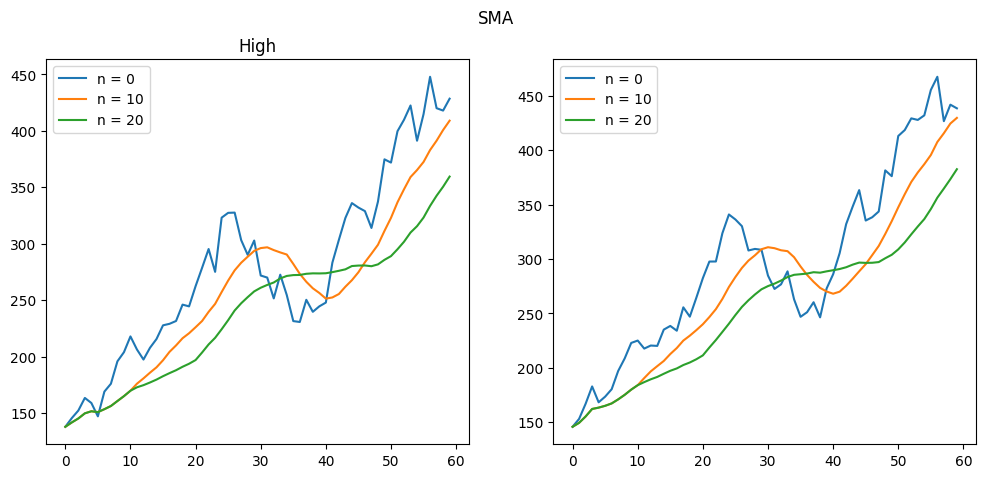

In [4]:
avg1 = a.SMA(['Open', 'High'], 0)
avg2 = a.SMA(['Open', 'High'], 10)
avg3 = a.SMA(['Open', 'High'], 20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('SMA')

ax1.set_title('Open')
ax1.plot(range(avg1.shape[1]), avg1[0], range(avg2.shape[1]), avg2[0], range(avg3.shape[1]), avg3[0])
ax1.legend(["n = 0", "n = 10", "n = 20"])

ax1.set_title('High')
ax2.plot(range(avg1.shape[1]), avg1[1], range(avg2.shape[1]), avg2[1], range(avg3.shape[1]), avg3[1])
ax2.legend(["n = 0", "n = 10", "n = 20"])

Вычисление дифференциала

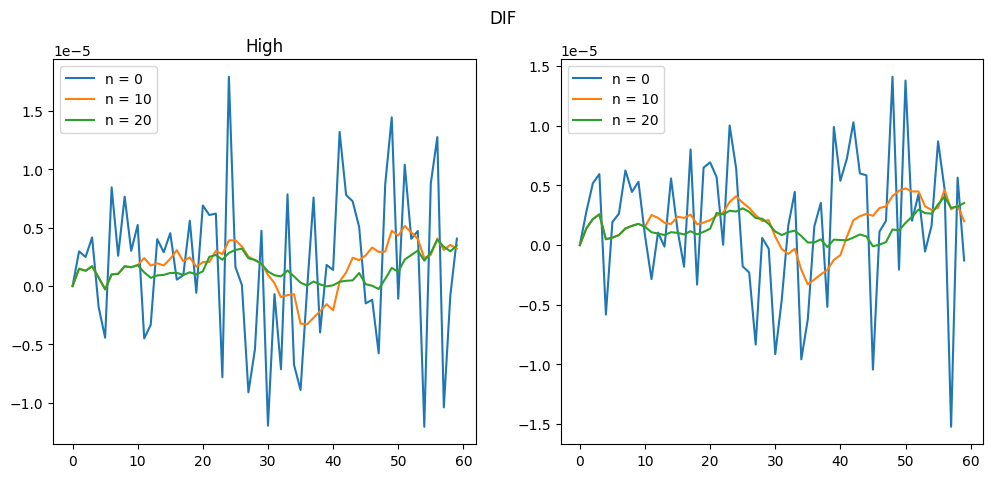

In [5]:
dif1 = a.diff(['Open', 'High'], 0)
dif2 = a.diff(['Open', 'High'], 10)
dif3 = a.diff(['Open', 'High'], 20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('DIF')

ax1.set_title('Open')
ax1.plot(range(avg1.shape[1]), dif1[0], range(avg2.shape[1]), dif2[0], range(avg3.shape[1]), dif3[0])
ax1.legend(["n = 0", "n = 10", "n = 20"])

ax1.set_title('High')
ax2.plot(range(avg1.shape[1]), dif1[1], range(avg2.shape[1]), dif2[1], range(avg3.shape[1]), dif3[1])
ax2.legend(["n = 0", "n = 10", "n = 20"])

Получение экстремумов

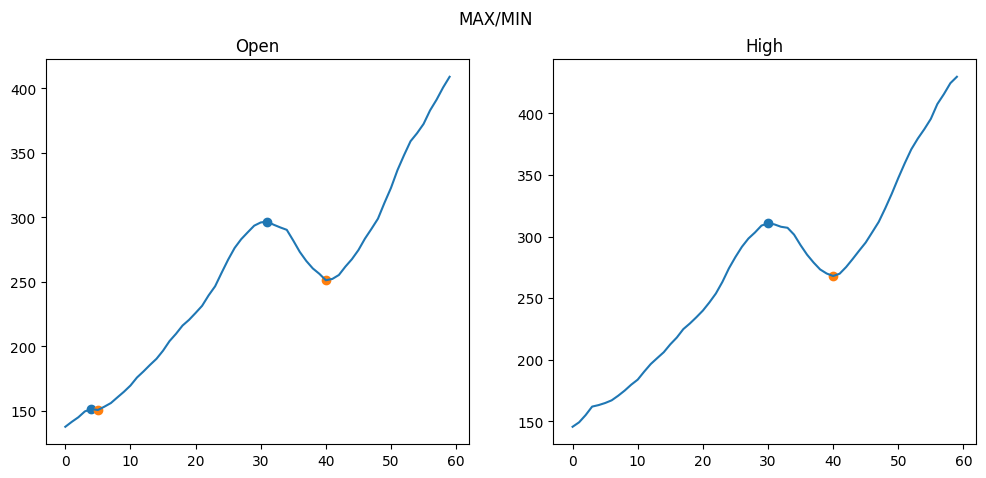

In [6]:
maxs = a.max_points(['Open', 'High'], 10)
mins = a.min_points(['Open', 'High'], 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('MAX/MIN')

ax1.set_title('Open')
ax1.plot(avg2[0])
ax1.scatter(maxs[0], avg2[0][maxs[0]])
ax1.scatter(mins[0], avg2[0][mins[0]])

ax2.set_title('High')
ax2.plot(avg2[1])
ax2.scatter(maxs[1], avg2[1][maxs[1]])
ax2.scatter(mins[1], avg2[1][mins[1]])

In [7]:
extermes = a.extreme_points(['Open', 'High'], 0)

Получение автокорелляции

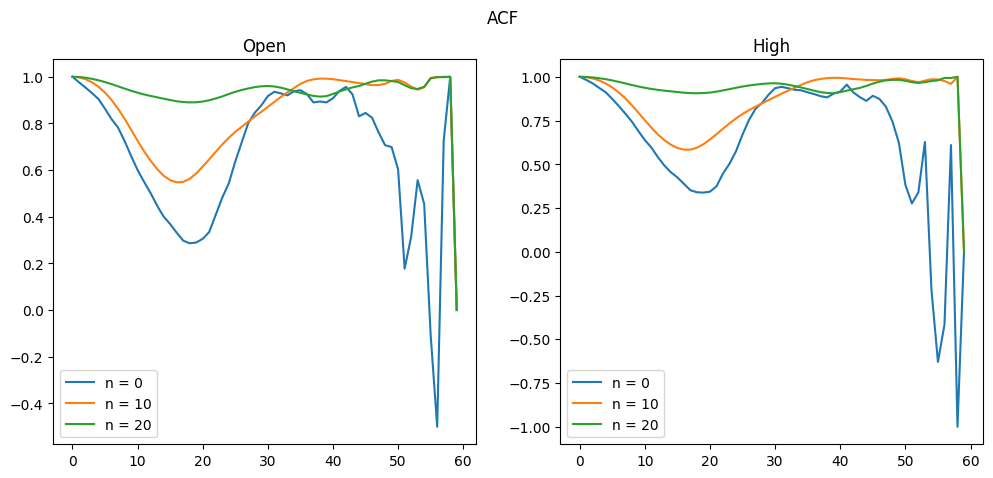

In [8]:
acf1 = a.ACF(['Open', 'High'], 0)
acf2 = a.ACF(['Open', 'High'], 10)
acf3 = a.ACF(['Open', 'High'], 20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('ACF')

ax1.set_title('Open')
ax1.plot(range(avg1.shape[1]), acf1[0])
ax1.plot(range(avg1.shape[1]), acf2[0])
ax1.plot(range(avg1.shape[1]), acf3[0])
ax1.legend(["n = 0", "n = 10", "n = 20"])

ax2.set_title('High')
ax2.plot(range(avg1.shape[1]), acf1[1])
ax2.plot(range(avg1.shape[1]), acf2[1])
ax2.plot(range(avg1.shape[1]), acf3[1])
ax2.legend(["n = 0", "n = 10", "n = 20"])

In [9]:
a.save_data_frame("output.xlsx")